In [85]:
!pip install tensorflow


In [71]:
# Import necessary libraries
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from time import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [72]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display the shape of the training and testing data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


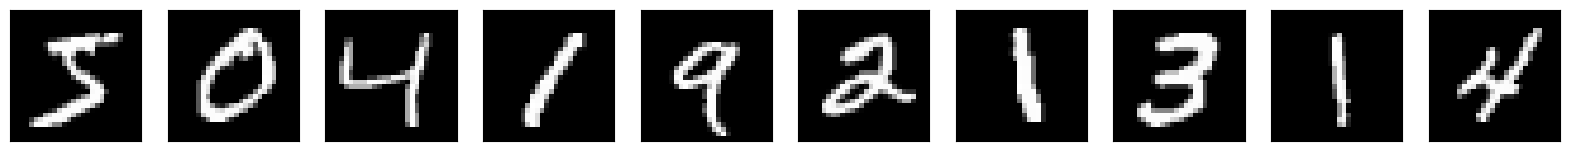

In [73]:
# Display the first 'n' images from the training set
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))  # Create a figure for the images

for i in range(n):
    ax = plt.subplot(2, n, i + 1)  # Create a subplot for each image
    plt.imshow(x_train[i].reshape(28, 28))  # Display the image
    plt.gray()  # Set the color map to grayscale
    ax.get_xaxis().set_visible(False)  # Hide the x-axis
    ax.get_yaxis().set_visible(False)  # Hide the y-axis

plt.show()  # Show the plot
plt.close()  # Close the plot

In [74]:
x_train = x_train.reshape(60000, 28*28*1)
x_test = x_test.reshape(10000, 28*28*1)

print("Reshaped x_train shape: {} \nReshaped x_test shape:{}".format(x_train.shape, x_test.shape))

Reshaped x_train shape: (60000, 784) 
Reshaped x_test shape:(10000, 784)




## **Min-Max Scalling**

In [75]:
# Normalize the pixel values to be between 0 and 1 (Min-Max Scaling)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [76]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [77]:
# Display the shape of the processed training and testing data
print(f"x_train shape after processing: {x_train.shape}")
print(f"y_train shape after processing: {y_train.shape}")
print(f"x_test shape after processing: {x_test.shape}")
print(f"y_test shape after processing: {y_test.shape}")

x_train shape after processing: (60000, 784)
y_train shape after processing: (60000, 10)
x_test shape after processing: (10000, 784)
y_test shape after processing: (10000, 10)


In [78]:
# Define the neural network architecture
input_size = 28*28  # Size of each input image (flattened)
batch_size = 200  # Batch size for training
hidden1 = 50  # Number of neurons in the first hidden layer
hidden2 = 25  # Number of neurons in the second hidden layer
classes = 10  # Number of output classes (digits 0-9)
epochs = 15  # Number of training epochs

In [79]:
# Initialize the model
model = Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))  # First hidden layer
model.add(Dense(hidden2, activation='relu'))  # Second hidden layer
model.add(Dense(classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,785 (159.32 KB)

 Trainable params: 40,785 (159.32 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Fit the model on the training data
tic = time()  # Start timing
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
toc = time()  # End timing

# Display the time taken for training
print(f"Model training took {toc - tic} seconds")

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7123 - loss: 0.9623
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9275 - loss: 0.2534
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9482 - loss: 0.1820
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9563 - loss: 0.1515
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9633 - loss: 0.1293
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9683 - loss: 0.1065
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0951
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0864
Epoch 9/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9780 - loss: 0.0761
Epoch 10/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.0718
Epoch 11/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9812 - loss: 0.0650
Epoch 12/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [81]:
# Test the trained model on the test data
y_pred_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the max probability
y_test_actual = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integers
test_accuracy = accuracy_score(y_pred, y_test_actual)
print(f'\nTest Accuracy: {test_accuracy}')


Test Accuracy: 0.9695


In [82]:
# Visualize predictions on a subset of the test set
X_valid = x_test[:20]  # Select the first 20 samples for validation
actual_labels = y_test[:20]

y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.argmax(y_pred_probs_valid, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


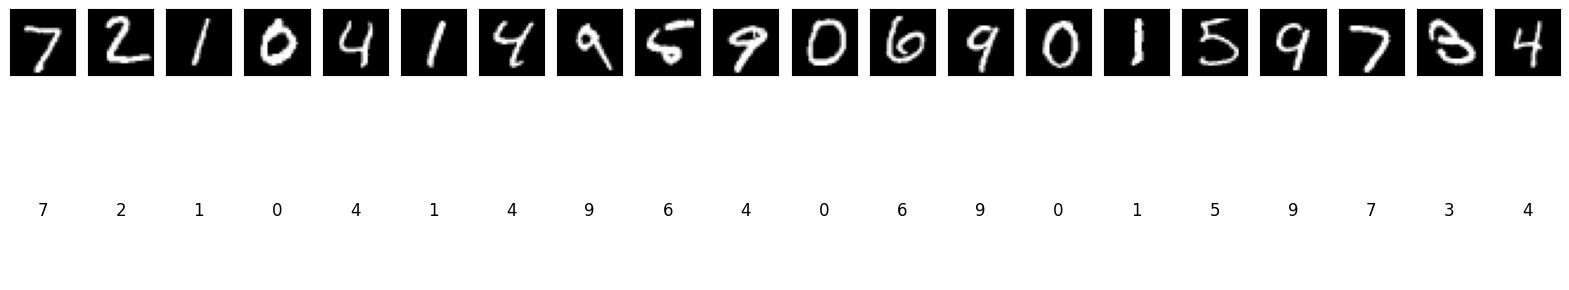

In [83]:
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit below each image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(y_pred_valid[i]), fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.show()  # Show the plot
plt.close()  # Close the plot

In [84]:
from google.colab import files

# Save the model as a .h5 file
model.save('mnist_model.h5')

# Download the saved model file
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>